In [1]:
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from collections import defaultdict

In [2]:
import pickle, os
def store(variable, name):
    try:
        out_file = open('data/'+name+'.pkl', 'wb')
        pickle.dump(variable, out_file)
        out_file.close()
        return True
    except:
        return False

def load(name):
    file_name = 'data/'+name+'.pkl'
    if os.path.exists(file_name):
        in_file = open(file_name, 'rb')
        variable = pickle.load(in_file)
        in_file.close()
        return variable
    else:
        return None

In [3]:
def load_data(in_file, brands_to_load = None, max_limit = 1404, verbose = False, randomize = True):
    """Loads data from the given data file.
    If the brands to be loaded is less than the maximum rows in the datafile, randomize the loading.
    Args:
      brands_to_load .... Number of brands to be loaded.
      in_file       .... A string representing the location and datafile name to be loaded.
    Returns:
      None. The data is loaded into the global variables."""
    
    if brands_to_load is None:
        brands_to_load = max_limit 
    
    #Randomize Loading
    if brands_to_load != max_limit:
        if randomize:
            choices = sorted(random.sample(range(max_limit), brands_to_load))
            max_row_id = max(choices)
        else:
            choices = range(brands_to_load)
            max_row_id = max(choices)
    else:
        choices = range(max_limit)
        max_row_id = max_limit-1
    
    brand_no = 0
    cur_idx = 0
            
    with open(in_file) as data_file:
        for row in data_file:
            if brand_no > max_row_id:
                break
            if brand_no != choices[cur_idx]:
                brand_no += 1
                continue
            else:
                followers = row.split()
                brand = followers.pop(0)
                followers_count = len(followers)
                
                #Ignoring brands with less than 1000 followers
                if followers_count > 1000:  
                    followers = [int(x) for x in followers]
                    BRAND_FOLLOWERS[brand] = set(followers)
                    BRANDS_LIST.append(brand)
                    
                    for f in followers:
                        if f not in UNIQUE_FOLLOWERS:
                            UNIQUE_FOLLOWERS[f] = set()
                        UNIQUE_FOLLOWERS[f].add(brand)
                    print('Loaded',brand,'-',followers_count,'followers')
                else:
                    print('Skipped',brand,'-',followers_count,'followers')
                    
                brand_no += 1
                cur_idx += 1
                    
    return

In [ ]:
BRANDS_LIST = []
UNIQUE_FOLLOWERS = {}
BRAND_FOLLOWERS = {}
verbose = True
#randomize = False
randomize = True
start = datetime.now()
#brands_to_load = 50
#max_rows = 1404
#load_data('data/brand_followers_final.tsv', brands_to_load, max_rows, verbose, randomize)
brands_to_load = 200
max_rows = 571
load_data('data/brand_followers_corrected_full.tsv', brands_to_load, max_rows, verbose, randomize)
print('Elapsed:',datetime.now()-start)
N_BRANDS = len(BRAND_FOLLOWERS)
N_FOLLOWERS = len(UNIQUE_FOLLOWERS)
print('No. of Unique Followers', N_FOLLOWERS)
print('No. of Brands', N_BRANDS)

In [4]:
BRAND_SECTOR = {}
row_no = 0
with open('data/sectors.txt') as data_file:
        for row in data_file:
            if row_no == 0:
                row_no += 1
                continue
            data = row.strip().split(',')
            sector = data[0].lower().replace(' ','_')
            brand = data[1].lower()
            if sector in BRAND_SECTOR:
                BRAND_SECTOR[sector].add(brand)
            else:
                BRAND_SECTOR[sector] =set([brand])
SECTORS = sorted(list(BRAND_SECTOR.keys()))
brands = set()
for s in SECTORS:
    print(s, len(BRAND_SECTOR[s]),BRAND_SECTOR[s])
    brands = brands | set(BRAND_SECTOR[s])
len(brands)

apparel 24 {'benetton', 'adidas', 'burberry', 'ellentracynyc', 'blueqness', 'hugoboss', 'dolcegabbana', 'freepeople', 'azzaro', 'anntaylor', 'eckounltd', 'juicycouture', 'fendi', 'anthropologie', 'guess', 'givenchy', 'prana', 'dior', 'armani', 'hollisterco', 'americanapparel', 'chanel', 'ralphlauren', 'calvinklein'}
appliances 12 {'amanabrand', 'fab', 'frigidaire', 'dacorkitchen', 'ge_reports', 'fagorind_eng', 'monogramappl', 'jennairusa', 'cuisinart', 'electrolux', 'fisherpaykelus', 'earthlite'}
baby 10 {'babyblanketgift', 'bumboosa', 'babiesrus', 'junebeebaby', 'babyganics', 'bbuttonsbabies', 'babobotanicals', 'boogiemom', 'carabnaturally', 'bambinomio'}
banking 1 {'discover'}
car 18 {'ford', 'bentleymotors', 'dodge', 'jaguarusa', 'bmwusa', 'acura_insider', 'honda', 'ferrariusa', 'cadillac', 'hyundai', 'astonmartin', 'jeep', 'buick', 'chevrolet', 'audi', 'kia', 'bugatti', 'chrysler'}
electronics 26 {'humminbirdfish', 'jblaudio', 'clarisonic', 'harmankardon', 'dlink', 'garmin', 'dell'

573

In [ ]:
UNIQUE_FOLLOWERS = load('UNIQUE_FOLLOWERS')
BRAND_FOLLOWERS = load('BRAND_FOLLOWERS')
BRANDS_LIST = load('BRANDS_LIST')

In [ ]:
def get_all_sectors():
    return set(BRAND_SECTOR.keys())

def get_brands_in_sector(sector):
    return BRAND_SECTOR[sector]

def get_sector(brand):
    for s in BRAND_SECTOR:
        if brand in BRAND_SECTOR[s]:
            return s
    print('No sector found for',brand)
    return None

def get_followers(brand):
    return BRAND_FOLLOWERS[brand]

def set_followers(brand, followers):
    BRAND_FOLLOWERS[brand] = followers
    
def set_brands(user, brands):
    UNIQUE_FOLLOWERS[user] = brands

def get_brands(user):
    return UNIQUE_FOLLOWERS[user]

def get_brand_id(brand):
    return BRANDS_LIST.index(brand)

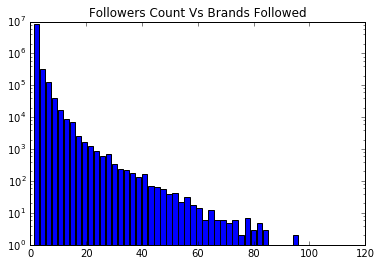

In [10]:
def plot_histogram(data,title):
    hist, bins = np.histogram(np.asarray(data),bins=50)    
    width = 0.9 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.yscale("log")
    plt.bar(center, hist, align='center', width=width)
    plt.title(title)

plot_histogram([len(v) for v in list(UNIQUE_FOLLOWERS.values())], 'Followers Count Vs Brands Followed')

In [11]:
def sample_followers(brands_min, sample_pct, split_ratio):
    ffollowers = list(map(lambda x: x[0], filter(lambda x: len(x[1]) >= brands_min, UNIQUE_FOLLOWERS.items())))
    sample = random.sample(ffollowers, int(len(ffollowers) * sample_pct))
    print('Sample taken: %d/%d followers.' % (len(sample),len(list(ffollowers))))
    train_sample_size = int(split_ratio * len(sample))
    train_sample = sample[:train_sample_size]
    test_sample = sample[train_sample_size:]
    print('Training samples:',train_sample_size)
    print('Testing samples:',len(sample)-train_sample_size)
    return train_sample, test_sample #return sample

train_samples, test_samples = sample_followers(brands_min=5, sample_pct= 0.01, split_ratio=0.7)
#follower_ids = sample_followers(brands_min=5, sample_pct= 0.01, split_ratio=0.75)


Sample taken: 3246/324683 followers.
Training samples: 2434
Testing samples: 812


In [9]:
store(BRANDS_LIST, 'BRANDS_LIST')

True

In [10]:
store(BRAND_FOLLOWERS, 'BRAND_FOLLOWERS')

True

In [17]:
store(UNIQUE_FOLLOWERS, 'UNIQUE_FOLLOWERS')

True

In [12]:
N_BRANDS = len(BRAND_FOLLOWERS)
N_FOLLOWERS = len(UNIQUE_FOLLOWERS)

In [13]:
def get_negative_samples(follower_ids):
    brands = {}
    for follower_id in follower_ids:
        brands_not_followed = set(BRANDS_LIST) - get_brands(follower_id)
        brands[follower_id] = random.choice(list(brands_not_followed))
    return brands

brands_for_training = get_negative_samples(train_samples)

In [14]:
def remove_links(followers):
    brands_to_remove = {}
    for follower_id in followers:
        brand = random.choice(list(get_brands(follower_id)))
        brands_to_remove[follower_id] = brand
        set_brands(follower_id,get_brands(follower_id) - set([brand]))
        set_followers(brand, get_followers(brand) - set([follower_id]))
        print('Removed link', follower_id,'-',brand)
    return brands_to_remove
removed_brands = remove_links(train_samples)

Removed link 717842023265337344 - hyundai
Removed link 3020805899 - bmwusa
Removed link 3044535087 - asus
Removed link 98413674 - bareminerals
Removed link 2347666884 - doritos
Removed link 465092582 - kevyn_aucoin
Removed link 2497000586 - godiva
Removed link 3017735881 - chevrolet
Removed link 19053178 - hyundai
Removed link 16180619 - jaguarusa
Removed link 2789615972 - jeep
Removed link 277746214 - covergirl
Removed link 3241932850 - pringles
Removed link 1909104458 - jaguarusa
Removed link 3929192133 - bareminerals
Removed link 2899074779 - hugoboss
Removed link 356456325 - doritos
Removed link 4910833989 - breyers
Removed link 1744276482 - pringles
Removed link 4706221112 - doritos
Removed link 15244831 - blue_bunny
Removed link 2343837620 - chevrolet
Removed link 2907705488 - pringles
Removed link 3086687958 - pringles
Removed link 3275187505 - bmwusa
Removed link 2435457463 - auracacia
Removed link 2481299223 - att
Removed link 3138028317 - chrysler
Removed link 2391703808 - br

In [15]:
def get_similarity_matrix():
    DIST_MAT = np.zeros((N_BRANDS,N_BRANDS))
    
    for tuple_pair in combinations(enumerate(BRANDS_LIST),2):
        b1 = get_followers(tuple_pair[0][1])
        b2 = get_followers(tuple_pair[1][1])
        
        #Jaccard Similarity Measure
        common_connections = len(b1.intersection(b2))
        total_connections = len(b1) + len(b2) - common_connections #More efficient than set(b1).union(b2)
        sim = common_connections/total_connections
        
        #Symmetrix Distance Matrix
        DIST_MAT[tuple_pair[0][0] , tuple_pair[1][0]] = DIST_MAT[tuple_pair[1][0] , tuple_pair[0][0]] = sim
    return DIST_MAT

DIST_MAT = get_similarity_matrix()
print('%d x %d Similarity Matrix created.'%(N_BRANDS,N_BRANDS))

200 x 200 Similarity Matrix created.


In [16]:
def get_statistics(values):
    import statistics
    mean = statistics.mean(values)
    median = statistics.median(values)
    maximum = max(values)
    minimum = min(values)
    return [mean, median, maximum, minimum]

In [17]:
def get_rank(sorted_scores, p_brand, n_brand):

    done = 0
    p_rank = None
    n_rank = None
    for idx, brand_score in enumerate(sorted_scores):
        if brand_score[0] == p_brand:
            p_rank = idx + 1
            done += 1
        elif brand_score[0] == n_brand:
            n_rank = idx + 1
            done += 1
        if done == 2:
            break;
    if done < 2:
        print(p_brand,p_rank, n_brand, n_rank)
    return p_rank, n_rank

In [18]:
def get_prediction(follower_ids, p_brands, n_brands):
    p_rank = {}
    n_rank = {}
    
    for follower_id in follower_ids:
        brands_followed = get_brands(follower_id)
        brands_not_followed = set(BRANDS_LIST) - brands_followed
            
        scores = {}
        for brand_not_followed in brands_not_followed:
            bnf_idx = get_brand_id(brand_not_followed)
            scores[brand_not_followed] = 0
            
            for brand_followed in brands_followed:
                bf_idx = get_brand_id(brand_followed)
                scores[brand_not_followed] += DIST_MAT[bf_idx, bnf_idx]
    
        prediction = sorted(scores.items(), key=lambda x: x[1]/len(brands_followed), reverse=True)
        p_rank[follower_id], n_rank[follower_id] = get_rank(prediction, p_brands[follower_id], n_brands[follower_id])
        
    return p_rank, n_rank

positive_rank_prediction, negative_rank_prediction = get_prediction(train_samples,removed_brands,brands_for_training)

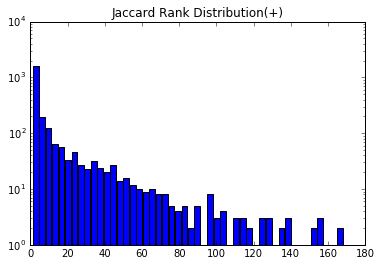

In [19]:
plot_histogram(list(positive_rank_prediction.values()),'Jaccard Rank Distribution(+)')

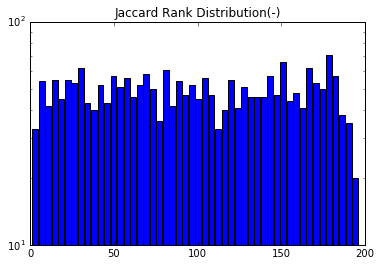

In [20]:
plot_histogram(list(negative_rank_prediction.values()),'Jaccard Rank Distribution(-)')

In [21]:
print('\t\t\t  ',['mean', 'median', 'max', 'min'])
positive_statistics = get_statistics(positive_rank_prediction.values())
print('Jaccard Rank Statistics(+)', positive_statistics)
negative_statistics = get_statistics(negative_rank_prediction.values())
print('Jaccard Rank Statistics(-)', negative_statistics)

			   ['mean', 'median', 'max', 'min']
Jaccard Rank Statistics(+) [10.715283483976993, 2.0, 175, 1]
Jaccard Rank Statistics(-) [97.7834839769926, 97.0, 196, 1]


In [22]:
def get_worst_prediction(prediction, brands, source='+'):
    if source == '+':
        id_worst,rank_worst = max(prediction.items(), key=lambda x: x[1])
    elif source == '-':
        id_worst,rank_worst = min(prediction.items(), key=lambda x: x[1])
    print('(%s) Worst Jaccard Prediction %d for %s followed by %s'%(source, rank_worst, brands[id_worst], id_worst))
    print('Brands Followed', get_brands(id_worst))
get_worst_prediction(positive_rank_prediction,removed_brands, '+')
get_worst_prediction(negative_rank_prediction,brands_for_training,'-')

(+) Worst Jaccard Prediction 175 for cardinalhealth followed by 1076514884
Brands Followed {'butterfinger', 'hyundai', 'fstg_chips', 'kia'}
(-) Worst Jaccard Prediction 1 for kia followed by 339298360
Brands Followed {'jaguarusa', 'hyundai', 'chevrolet', 'jeep', 'hugoboss', 'bmwusa'}


In [23]:
def bar_plot(data_points, title):
    x = [p[0] for p in data_points]
    y = [p[1] for p in data_points]
    plt.bar(x,y)
    plt.title(title)

In [24]:
def get_rank_by_brands_count(follower_ids, prediction_rank):
    mean_rank = {}
    brands_followed_count = {}
    for follower_id in follower_ids:
        count = len(get_brands(follower_id))
        if count in mean_rank.keys():
            mean_rank[count] += prediction_rank[follower_id]
            brands_followed_count[count] += 1
        else:
            mean_rank[count] = prediction_rank[follower_id]
            brands_followed_count[count] = 1
    for k in mean_rank:
        mean_rank[k] //= brands_followed_count[k]
    return mean_rank

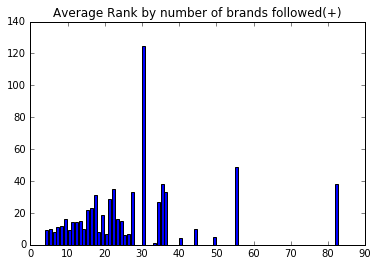

In [25]:
positive_mean_ranks = get_rank_by_brands_count(train_samples, positive_rank_prediction)
bar_plot(positive_mean_ranks.items(),'Average Rank by number of brands followed(+)')

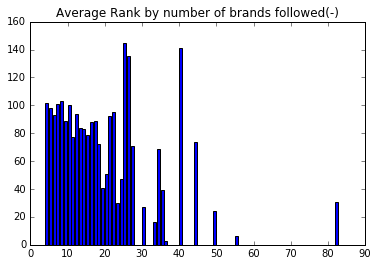

In [26]:
negative_mean_ranks = get_rank_by_brands_count(train_samples, negative_rank_prediction)
bar_plot(negative_mean_ranks.items(),'Average Rank by number of brands followed(-)')

In [27]:
def get_ranks_by_followed_brands_count(follower_ids, rank_prediction):

    statistics = {}
    brands_followed = {}
    for follower_id in follower_ids:
        count = len(get_brands(follower_id))
        if count in brands_followed.keys():
            brands_followed[count].append(rank_prediction[follower_id])
        else:
            brands_followed[count] = [rank_prediction[follower_id]]
    for key in brands_followed:
        statistics[key] = get_statistics(brands_followed[key])
    
    return statistics

positive_binned_statistics = get_ranks_by_followed_brands_count(train_samples, positive_rank_prediction)
negative_binned_statistics = get_ranks_by_followed_brands_count(train_samples, negative_rank_prediction)

In [28]:
def get_Jaccard_scores(follower_id):
    
    brands_followed = get_brands(follower_id)
    brands_not_followed = set(BRANDS_LIST) - brands_followed

    count = len(brands_followed)
    scores = {}
    for brand_not_followed in brands_not_followed:
        bnf_idx = BRANDS_LIST.index(brand_not_followed)
        scores[brand_not_followed] = 0
        
        for brand_followed in brands_followed:
            bf_idx = BRANDS_LIST.index(brand_followed)
            scores[brand_not_followed] += DIST_MAT[bf_idx, bnf_idx]
    for b in scores:
        scores[b] /= count
    return scores

In [29]:
def get_adamic_adar_score(follower, brand):
    from math import log
    scores = {}
    
    brands_followed = get_brands(follower)
    count = len(brands_followed)
    for b in brands_followed:
        common_neighbours = get_followers(b) & get_followers(brand)
        scores[b] = 0
        for f in common_neighbours:
            scores[b] += 1/log(len(get_brands(f)))
        
    return get_statistics(scores.values())

In [30]:
def get_common_neighbor_stats(follower, brand):
    count = {}
    
    brands_followed = get_brands(follower)
    for b in brands_followed:
        common_neighbors = get_followers(b) & get_followers(brand)
        count[b] = len(common_neighbors)        
    return get_statistics(count.values())

In [31]:
def get_sector_stats(follower, brand, similarity_scores):
    brands_followed = get_brands(follower)
    sector = get_sector(brand)
    
    count_by_sector = defaultdict(int)
    score_by_sector = defaultdict(float)
    brand_sector = []
    for b in brands_followed:
        s = get_sector(b)
        brand_sector.append((b,s))
        count_by_sector[s] += 1
        similar_brands = get_brands_in_sector(s)
        for s_b in similar_brands:
            if s_b in similarity_scores:
                score_by_sector[s] += similarity_scores[s_b]

    count_list = []
    score_list = []
    wtd_sum = 0
    for s in SECTORS:
        c = count_by_sector[s]
        count_list.append(c)
        if c > 0:
            score_list.append(score_by_sector[s]/c)
        else:
            score_list.append(0.0)
        wtd_sum += c * score_by_sector[s]
    
    avgs = [sum(score_list)/len(score_list), wtd_sum/sum(count_list)]
    
    return count_list + score_list + avgs

In [32]:
def get_features(follower, brand, scores):
    
    record = []
    record.append(scores[brand])
    record.extend(get_statistics(scores.values()))
    
    
    n_brand = len(get_brands(follower))
    record.append(n_brand/N_BRANDS)
    
    n_follower = len(get_followers(brand))    
    record.append(n_follower/N_FOLLOWERS)
    
    sector_stats = get_sector_stats(follower, brand, scores)
    record.extend(sector_stats)
    
    #prefrtl_atchmnt = n_brand * n_follower
    #record.append(prefrtl_atchmnt)
    
    #aa_score = get_adamic_adar_score(follower,brand)
    #record.extend(aa_score)
    
    cn_score = get_common_neighbor_stats(follower,brand)
    record.extend(cn_score)
    
    #cosine_sim = get_cosine_stats(follower, brand)
    #sim_rank = get_sim_rank_stats(follower, brand)
    
    return record

In [33]:
def get_records(follower_ids, removed_brands, brands):
    positive_records = {}
    negative_records = {}
    for follower_id in follower_ids:
        p_brand = removed_brands[follower_id]
        n_brand = brands[follower_id]
        scores = get_Jaccard_scores(follower_id)
        p_record = get_features(follower_id, p_brand,scores)
        n_record = get_features(follower_id, n_brand,scores)
        positive_records[follower_id] = p_record
        negative_records[follower_id] = n_record
    return positive_records, negative_records

positive_records, negative_records = get_records(train_samples, removed_brands, brands_for_training)

In [34]:
def get_sample_stats(records):
    records = np.asarray(records)
    n, m = records.shape
    for i in range(m):
        print('Feature %d:'%(i+1), get_statistics(list(records[:,i])))
print('(+) Samples Stats:')
get_sample_stats(list(positive_records.values()))
print('(-) Samples Stats:')
get_sample_stats(list(negative_records.values()))

(+) Samples Stats:
Feature 1: [0.087365988012841483, 0.081129530134895822, 0.21578411025917499, 0.00038894538529024559]
Feature 2: [0.0054210544770711619, 0.0051437302087332555, 0.010822847592258353, 0.00088393855801835041]
Feature 3: [0.0019098559763533055, 0.0018487534228088598, 0.0061318482031574445, 0.00017156269118332297]
Feature 4: [0.1124746357371218, 0.10831187296108327, 0.21578411025917499, 0.0089468557379962319]
Feature 5: [1.5656374815730005e-05, 8.6899522592709713e-06, 0.0002067413814810804, 0.0]
Feature 6: [0.031275677896466722, 0.025000000000000001, 0.40999999999999998, 0.02]
Feature 7: [0.032659901258510739, 0.034208585398003248, 0.057942096685436602, 0.00015019466789423173]
Feature 8: [0.32169268693508629, 0.0, 5.0, 0.0]
Feature 9: [0.023829087921117501, 0.0, 3.0, 0.0]
Feature 10: [0.034511092851273621, 0.0, 3.0, 0.0]
Feature 11: [0.0, 0.0, 0.0, 0.0]
Feature 12: [1.8976992604765817, 0.0, 7.0, 0.0]
Feature 13: [0.29663105998356615, 0.0, 7.0, 0.0]
Feature 14: [0.008216926

In [35]:
x_train = []
y_train = []
for follower_id in train_samples:
    x_train.append(positive_records[follower_id])
    y_train.append(1)
    x_train.append(negative_records[follower_id])
    y_train.append(0)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [36]:
def get_metrics(actual, prediction, verbose=False):
    from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
    metrics = {}
    metrics['cm'] = confusion_matrix(actual,prediction)
    metrics['accuracy'] = accuracy_score(actual,prediction)
    metrics['precision'] = precision_score(actual,prediction)
    metrics['recall'] = recall_score(actual,prediction)
    #metrics['f1'] = f1_score(actual,prediction)
    if verbose:
        print('Confusion Matrix:\n',metrics['cm'])
        #print('F1-Score:',metrics['f1'])
        print('Accuracy:', metrics['accuracy'])
        print('Precision:', metrics['precision'])
        print('Recall:', metrics['recall'])
    return metrics    

In [37]:
def plot_pr_curve(y_true, y_prob):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, label='Precision-Recall curve')

def plot_auc_curve(y_true, y_prob):
    from sklearn.metrics import roc_auc_score, roc_curve
    print('AUC:',roc_auc_score(y_true, y_prob))
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label='ROC Curve')

In [38]:
def getFMeasure(precision, recall):
    k = len(precision)
    fm = np.zeros(k)
    for i in range(k):
        fm[i] = 2* precision[i]*recall[i]/(precision[i]+recall[i])
    return fm

In [39]:
def get_overall_metrics(metrics, n):
    
    conf_mat = np.zeros((2, 2))
    precision = 0 #np.empty((1,2))
    recall = 0 #np.empty((1,2))
    accuracy=0
    
    for i in range(n):
        conf_mat = np.add(conf_mat, metrics[i]['cm'])
        #precision = np.vstack((precision, metrics[i]['precision']))
        #recall = np.vstack((recall, metrics[i]['recall']))
        precision += metrics[i]['precision']
        recall += metrics[i]['recall']
        accuracy += metrics[i]['accuracy']
    
    precision /= n 
    recall /= n 
    #fMeasure = getFMeasure(precision, recall)
    accuracy/=n
    
    print("Confusion Matrix:")
    print (conf_mat)
    print ("Accuracy\t:\t", accuracy)
    print ("Precision\t:\t", precision)
    print ("Recall\t\t:\t", recall)
    #print ("F-Measure\t:\t", fMeasure[1])
        

In [40]:
def standardize(X):
    from sklearn.preprocessing import StandardScaler
    return StandardScaler().fit_transform(X)
x_train = standardize(x_train)

In [41]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
class BaselineClf():
    def __init__(self):
        #param = {'C': 166.81005372000593, 'dual': False, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
        #self.clf = LogisticRegression(**param)
        param = {'alpha': 0.0001, 'l1_ratio': 0.75, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'n_iter': 50, 'penalty': 'l1'}
        #param={'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'n_iter': 50, 'penalty': 'elasticnet'}
        self.clf = SGDClassifier(**param)
    
    def fit(self, X, Y):
        k = 10   #K-Fold 
        from sklearn.model_selection import KFold
        kfold_cv = KFold(n_splits=k)
        results = []
        for train, test in kfold_cv.split(X):
            self.clf.fit(X[train],Y[train])
            y_predict = self.clf.predict(X[test])
            results.append(get_metrics(Y[test], y_predict))
        get_overall_metrics(results, k)
    
    def predict(self, X):
        return self.clf.predict(X)
    
    def predict_proba(self, X):
        return self.clf.predict_proba(X)       
    
    def get_coef(self):
        print('\nCoefficients:')
        for i in range(self.clf.coef_.shape[1]):
            print('Feature %d : %f'%(i+1, self.clf.coef_[0,i]))
    def precision_recall_curve(self):
        plot_pr_curve(y_train, y_train_prob[:,1])
    
    def auc_curve(self):
        plot_auc_curve(y_train, y_train_prob[:,1])

In [42]:
clf = BaselineClf()
clf.fit(x_train, y_train)
clf.get_coef()

Confusion Matrix:
[[ 2127.   307.]
 [  368.  2066.]]
Accuracy	:	 0.861332927726
Precision	:	 0.875572445978
Recall		:	 0.848821088848

Coefficients:
Feature 1 : 5.987832
Feature 2 : -0.203802
Feature 3 : 0.493264
Feature 4 : -0.299754
Feature 5 : 0.000000
Feature 6 : 0.000000
Feature 7 : 0.686356
Feature 8 : -0.461790
Feature 9 : 0.067350
Feature 10 : 0.000000
Feature 11 : 0.000000
Feature 12 : -0.819609
Feature 13 : 0.000000
Feature 14 : 0.000000
Feature 15 : 0.000000
Feature 16 : 0.000000
Feature 17 : 0.000000
Feature 18 : 0.000000
Feature 19 : 0.000000
Feature 20 : 0.000000
Feature 21 : -0.446412
Feature 22 : 0.000000
Feature 23 : 0.000000
Feature 24 : 0.000000
Feature 25 : 0.000000
Feature 26 : 0.497729
Feature 27 : 0.000000
Feature 28 : 0.000000
Feature 29 : 0.000000
Feature 30 : 0.000000
Feature 31 : 0.000000
Feature 32 : 0.000000
Feature 33 : 0.000000
Feature 34 : 0.000000
Feature 35 : 0.000000
Feature 36 : 0.000000
Feature 37 : 0.000000
Feature 38 : -10.827388
Feature 39 : 2.97

In [44]:
#0.0001,modified_huber,l2,optimal 0.85
#'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'n_iter': 50, 'penalty': 'elasticnet', 0.88
#'alpha': 0.0001, 'l1_ratio': 0.9, 'learning_rate': 'optimal', 'loss': 'hinge', 'n_iter': 50, 'penalty': 'elasticnet', 0.888
#'alpha': 0.0001, 'eta0': 0.1, 'l1_ratio': 0.75, 'learning_rate': 'constant', 'loss': 'hinge', 'n_iter': 100, 'penalty': 'l1'}, 0.8899
#'alpha': 0.0001, 'l1_ratio': 0.75, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'n_iter': 50, 'penalty': 'l1'}, 0.893

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
params = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty':['elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 
    'learning_rate': ['constant','invscaling'],
    'n_iter': [5, 50, 100],
    'l1_ratio': [0.15, 0.3, 0.45, 0.6, 0.75, 0.9],
    'eta0': [0.1, 0.5]
}
search_clf = GridSearchCV(estimator=SGDClassifier(), param_grid=params)

In [45]:
search_clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'penalty': ['elasticnet'], 'learning_rate': ['constant', 'invscaling'], 'l1_ratio': [0.15, 0.3, 0.45, 0.6, 0.75, 0.9], 'loss': ['hinge', 'log', 'modified_huber'], 'eta0': [0.1, 0.5], 'n_iter': [5, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
search_clf.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.5, fit_intercept=True, l1_ratio=0.9,
       learning_rate='invscaling', loss='hinge', n_iter=100, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [47]:
search_clf.best_params_

{'alpha': 0.001,
 'eta0': 0.5,
 'l1_ratio': 0.9,
 'learning_rate': 'invscaling',
 'loss': 'hinge',
 'n_iter': 100,
 'penalty': 'elasticnet'}

In [48]:
search_clf.best_score_

0.87262817924909164

In [51]:
#'C': 3593.8136638046258, 'dual': False, 'penalty': 'l2', 'solver': 'lbfgs'
#'C': 27825.594022071258,  'dual': False,  'penalty': 'l2',  'solver': 'liblinear' 0.886
#'C': 27825.594022071258, 'dual': False, 'penalty': 'l2', 'solver': 'lbfgs', 0.886
#'C': 166.81005372000593, 'dual': False, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
c_range = np.logspace(0, 5, 10)
params = {
    'penalty': ['l1','l2'],
    'C': c_range,
    'tol': [1e-4, 1e-3, 1e-2],
    'solver': ['liblinear'] #['newton-cg', 'lbfgs'] #['liblinear', 'sag'] 
}
search_clf = GridSearchCV(estimator=LogisticRegression(), param_grid=params)

In [52]:
search_clf.fit(x_train,y_train)
search_clf.best_estimator_

LogisticRegression(C=2154.4346900318847, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.001, verbose=0, warm_start=False)

In [53]:
search_clf.best_params_

{'C': 2154.4346900318847, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}

In [54]:
search_clf.best_score_

0.86737989503431567

In [49]:
#'alpha': 0.0001, 'solver': 'lsqr', 'tol': 0.001, 0.86
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
params = {
    'alpha': [1,0.1, 0.01, 0.001, 0.0001, 0.00001],
    'tol': [1e-4, 1e-3, 1e-2],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'] 
}
search_clf = GridSearchCV(estimator=RidgeClassifier(), param_grid=params)

In [50]:
search_clf.fit(x_train,y_train)
search_clf.best_estimator_

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.001)

In [43]:
def add_removed_links(follower_ids, removed_brands):
    for follower in follower_ids:
        brand = removed_brands[follower]
        set_brands(follower, get_brands(follower) | set([brand]))
        set_followers(brand, get_followers(brand) | set([follower]))

add_removed_links(train_samples, removed_brands)

In [44]:
removed_brands_test = remove_links(test_samples)

Removed link 752280715849498624 - kia
Removed link 3313918175 - butterfinger
Removed link 3261386458 - kia
Removed link 2238881191 - dannon
Removed link 2505952320 - breyers
Removed link 864023329 - chinaglaze
Removed link 2181359733 - hersheys
Removed link 553907332 - butterfinger
Removed link 517924648 - bareminerals
Removed link 4562071101 - ralphlauren
Removed link 2332050175 - bmwusa
Removed link 2369966698 - blue_bunny
Removed link 2955656943 - jeep
Removed link 322056312 - iams
Removed link 56255564 - bmwusa
Removed link 3277197810 - bmwusa
Removed link 2674270953 - bmwusa
Removed link 45066889 - kia
Removed link 385036539 - herbalessences
Removed link 26542446 - bareminerals
Removed link 1239752538 - bmwusa
Removed link 2714260648 - jeep
Removed link 22397913 - duracell
Removed link 2837224617 - kia
Removed link 2786919954 - chevrolet
Removed link 117399090 - chrysler
Removed link 834725330 - hyundai
Removed link 3064819575 - bmwusa
Removed link 46134480 - bahlsenbiscuits
Remov

In [45]:
#Only For Repeating the Experiment
def reset_links(update_brands):
    for f_id in update_brands:
        brand = update_brands[f_id]
        set_brands(f_id,get_brands(follower_id) - set([brand]))
        set_followers(brand, get_followers(brand) - set([follower_id]))
        
#reset_links(removed_brands)
#add_removed_links(test_samples, removed_brands_test)

In [46]:
DIST_MAT = get_similarity_matrix()
print('%d x %d Similarity Matrix created.'%(N_BRANDS,N_BRANDS))

200 x 200 Similarity Matrix created.


In [49]:
k = 15
missing = []
brands_to_rank = {}
brands_to_lookup = {}
for follower_id in test_samples:
    scores = get_Jaccard_scores(follower_id)
    candidates = sorted(scores.items(), key=lambda x: x[1]/len(get_brands(follower_id)), reverse=True)
    brands_to_rank[follower_id] = []
    brands_to_lookup[follower_id] = []
    for brand, score in candidates[:k]:
        record = get_features(follower_id, brand,scores)
        brands_to_rank[follower_id].append(record)
        brands_to_lookup[follower_id].append(brand)
    if removed_brands_test[follower_id] not in brands_to_lookup[follower_id]:
        print('Missing brand %s for %d'%(removed_brands_test[follower_id], follower_id))
        pos = [x+1 for x, y in enumerate(candidates) if y[0] == removed_brands_test[follower_id]]
        print('Current Position:',pos[0])
        missing.append(pos[0])
        print('Brands followed are',','.join(list(UNIQUE_FOLLOWERS[follower_id])))
print('Missing Count:%d/%d'%(len(missing),len(test_samples)))
print(get_statistics(missing))

Missing brand dannon for 2238881191
Current Position: 19
Brands followed are ge_reports,asus,jewelosco,duracell
Missing brand ralphlauren for 4562071101
Current Position: 54
Brands followed are att,dietcoke,pringles,doritos,fanta
Missing brand iams for 322056312
Current Position: 46
Brands followed are gardein,cottonelle,godiva,bhcosmetics,jurliqueusa,eatwholly,bissellclean,hickoryfarms
Missing brand herbalessences for 385036539
Current Position: 27
Brands followed are annieshomegrown,elfcosmetics,canonusa,chobani,cobigelowny
Missing brand jif for 23228342
Current Position: 23
Brands followed are illyissimo,faygo,butterfinger,josie_maran,blue_bunny,breyers,elfcosmetics,bmwusa,bluediamond
Missing brand covergirl for 388943168
Current Position: 77
Brands followed are downy,derma_e,pretzelcrisps,beneful,jif,eatwholly,asus,flatoutbread,fishernutsbrand,aquaphorus,fischernwieser,friskies,bissellclean,hickoryfarms
Missing brand canonusa for 347974052
Current Position: 28
Brands followed are j

In [50]:
y_test_predict = []
y_test_actual = []
correct = 0
for follower_id in test_samples:
    x_test = []
    candidates = brands_to_rank[follower_id]
    
    for record in candidates:
        x_test.append(record)
    x_test = np.asarray(x_test)
    y_test_prob = clf.predict_proba(standardize(x_test))
    result = [(x,y[1]) for x,y in zip(brands_to_lookup[follower_id], y_test_prob)]
    result = sorted(result, key=lambda x: x[1], reverse=True)[0]
    if result[0] == removed_brands_test[follower_id]:
        correct += 1
    print(result[0]+'('+get_sector(result[0])+')', result[1], '[',removed_brands_test[follower_id]+'('+ get_sector(removed_brands_test[follower_id])+')',']')
print('%d/%d ='%(correct, len(test_samples)), correct/len(test_samples))
print('%d/%d ='%(correct, len(test_samples)-len(missing)), correct/(len(test_samples)-len(missing)))

kia(car) 1.0 [ kia(car) ]
hersheys(food) 1.0 [ butterfinger(food) ]
kia(car) 1.0 [ kia(car) ]
downy(household_che) 1.0 [ dannon(food) ]
breyers(food) 1.0 [ breyers(food) ]
bareminerals(personal_care) 1.0 [ chinaglaze(personal_care) ]
hersheys(food) 1.0 [ hersheys(food) ]
butterfinger(food) 1.0 [ butterfinger(food) ]
bareminerals(personal_care) 1.0 [ bareminerals(personal_care) ]
hersheys(food) 1.0 [ ralphlauren(apparel) ]
hyundai(car) 1.0 [ bmwusa(car) ]
butterfinger(food) 1.0 [ blue_bunny(food) ]
jeep(car) 1.0 [ jeep(car) ]
farmrichsnacks(food) 1.0 [ iams(pet_food) ]
bmwusa(car) 1.0 [ bmwusa(car) ]
bmwusa(car) 1.0 [ bmwusa(car) ]
bmwusa(car) 1.0 [ bmwusa(car) ]
kia(car) 1.0 [ kia(car) ]
bareminerals(personal_care) 1.0 [ herbalessences(personal_care) ]
bareminerals(personal_care) 1.0 [ bareminerals(personal_care) ]
chrysler(car) 1.0 [ bmwusa(car) ]
hyundai(car) 1.0 [ jeep(car) ]
butterfinger(food) 1.0 [ duracell(electronics) ]
kia(car) 1.0 [ kia(car) ]
chevrolet(car) 1.0 [ chevrolet(ca